<a href="https://colab.research.google.com/github/aizowl/WinequalityML/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
wine_dataset = pd.read_csv('winequality-red.csv')

In [ ]:
wine_dataset.shape

(1599, 12)

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


checking for missing values

In [ ]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

data analiz i vizualizacia

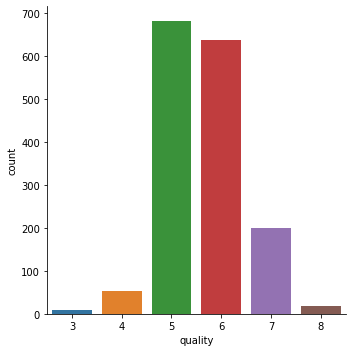

In [ ]:
sns.catplot(x= 'quality', data = wine_dataset, kind = 'count')

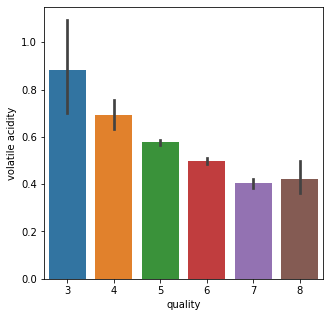

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y = 'volatile acidity', data= wine_dataset)

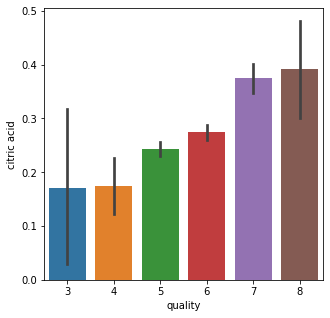

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y = 'citric acid', data= wine_dataset)

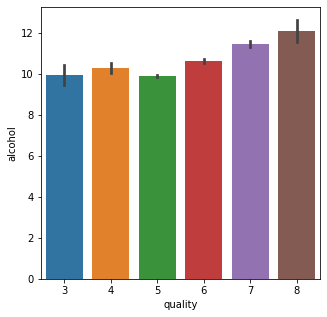

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y = 'alcohol', data= wine_dataset)

In [ ]:
correlation = wine_dataset.corr()

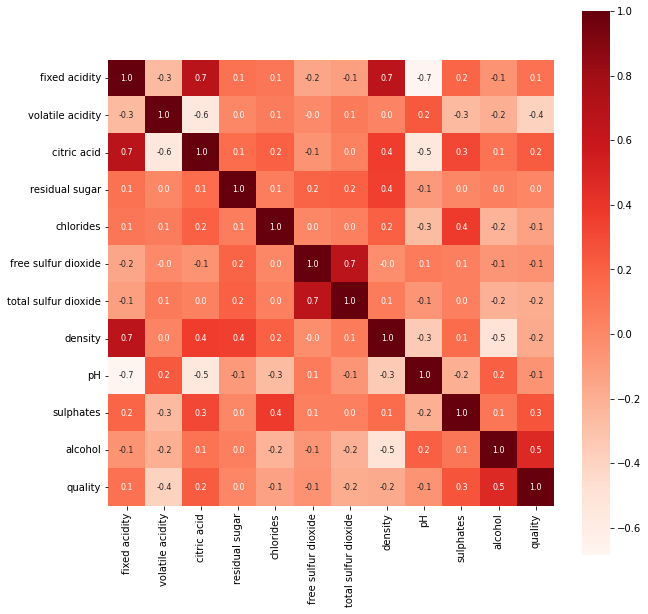

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Reds')

In [ ]:
X = wine_dataset.drop('quality', axis = 1)

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
print (Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(Y.shape,Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print ('Accuracy: ', test_data_accuracy)

Accuracy:  0.915625


In [ ]:
input_data = (7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print ('Good Quality Wine')
else:
  print('Bad quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
